In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
real=pd.read_excel("RealEstates.csv")

In [4]:
real.head()

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Avg Area Comfort
0,0,79545.458574,missing,?,NaN,23086.800503,$1059033.5578701235,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",0.289937
1,1,79248.642455,6.0029,6.730821,3.09,40173.072174,Rs20078.545531292668,"188 Johnson Views Suite 079\nLake Kathleen, CA...",NaN
2,2,61287.067179,5.86589,8.512727,5.13,36882.159400,$1058987.9878760849,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",NaN
3,3,63345.240046,7.188236,?,NaN,34310.242831,Rs16808.224088392624,USS Barnett\nFPO AP 44820,NaN
4,4,59982.197226,5.040555,7.839388,4.23,26354.109472,$630943.4893385402,USNS Raymond\nFPO AE 09386,NaN


In [5]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ids                           5000 non-null   int64  
 1   Avg. Area Income              5000 non-null   float64
 2   Avg. Area House Age           5000 non-null   object 
 3   Avg. Area Number of Rooms     5000 non-null   object 
 4   Avg. Area Number of Bedrooms  3333 non-null   float64
 5   Area Population               5000 non-null   float64
 6   Price                         5000 non-null   object 
 7   Address                       5000 non-null   object 
 8   Avg Area Comfort              200 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 351.7+ KB


Data has  9 columns, and 4999 rows.
there are null values in avg.area number of bedroom and avg area comfort.


In [6]:
real.describe()

,ids,Avg. Area Income,Avg. Area Number of Bedrooms,Area Population,Avg Area Comfort
count,5000.000000,5000.000000,3333.000000,5000.000000,200.000000
mean,2499.500000,68583.108984,3.998083,36163.516039,0.512601
std,1443.520003,10657.991214,1.239102,9925.650114,0.282111
min,0.000000,17796.631190,2.000000,172.610686,0.007437
25%,1249.750000,61480.562388,3.150000,29403.928702,0.260780
50%,2499.500000,68804.286404,4.050000,36199.406689,0.515369
75%,3749.250000,75783.338666,4.500000,42861.290769,0.766171
max,4999.000000,107701.748378,6.500000,69621.713378,0.991570


## Data cleaning

In [7]:
real["Avg. Area House Age"].value_counts()

missing             5
7.58525342394363    1
5.29742769564274    1
5.86699645261666    1
6.50113874124089    1
                   ..
5.6649705006483     1
4.65669574507247    1
5.90229584903971    1
5.58803815292307    1
5.99230530733397    1
Name: Avg. Area House Age, Length: 4996, dtype: int64

In [8]:
real["Avg. Area Number of Rooms"].value_counts()

?                   1667
6.67218106320965       1
7.21998352344203       1
8.02691202818351       1
6.89198032892623       1
                    ... 
8.24662101356097       1
6.17853505260068       1
6.54137569538824       1
4.43037246001408       1
6.79233610442498       1
Name: Avg. Area Number of Rooms, Length: 3334, dtype: int64

In [9]:
real["Avg. Area House Age"].replace("missing",np.nan,inplace=True)
real["Avg. Area House Age"]=real["Avg. Area House Age"].astype("float64")

In [10]:
real["Avg. Area Number of Rooms"].replace("?",np.nan,inplace=True)
real["Avg. Area Number of Rooms"]=real["Avg. Area Number of Rooms"].astype("float64")

In [11]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ids                           5000 non-null   int64  
 1   Avg. Area Income              5000 non-null   float64
 2   Avg. Area House Age           4995 non-null   float64
 3   Avg. Area Number of Rooms     3333 non-null   float64
 4   Avg. Area Number of Bedrooms  3333 non-null   float64
 5   Area Population               5000 non-null   float64
 6   Price                         5000 non-null   object 
 7   Address                       5000 non-null   object 
 8   Avg Area Comfort              200 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 351.7+ KB


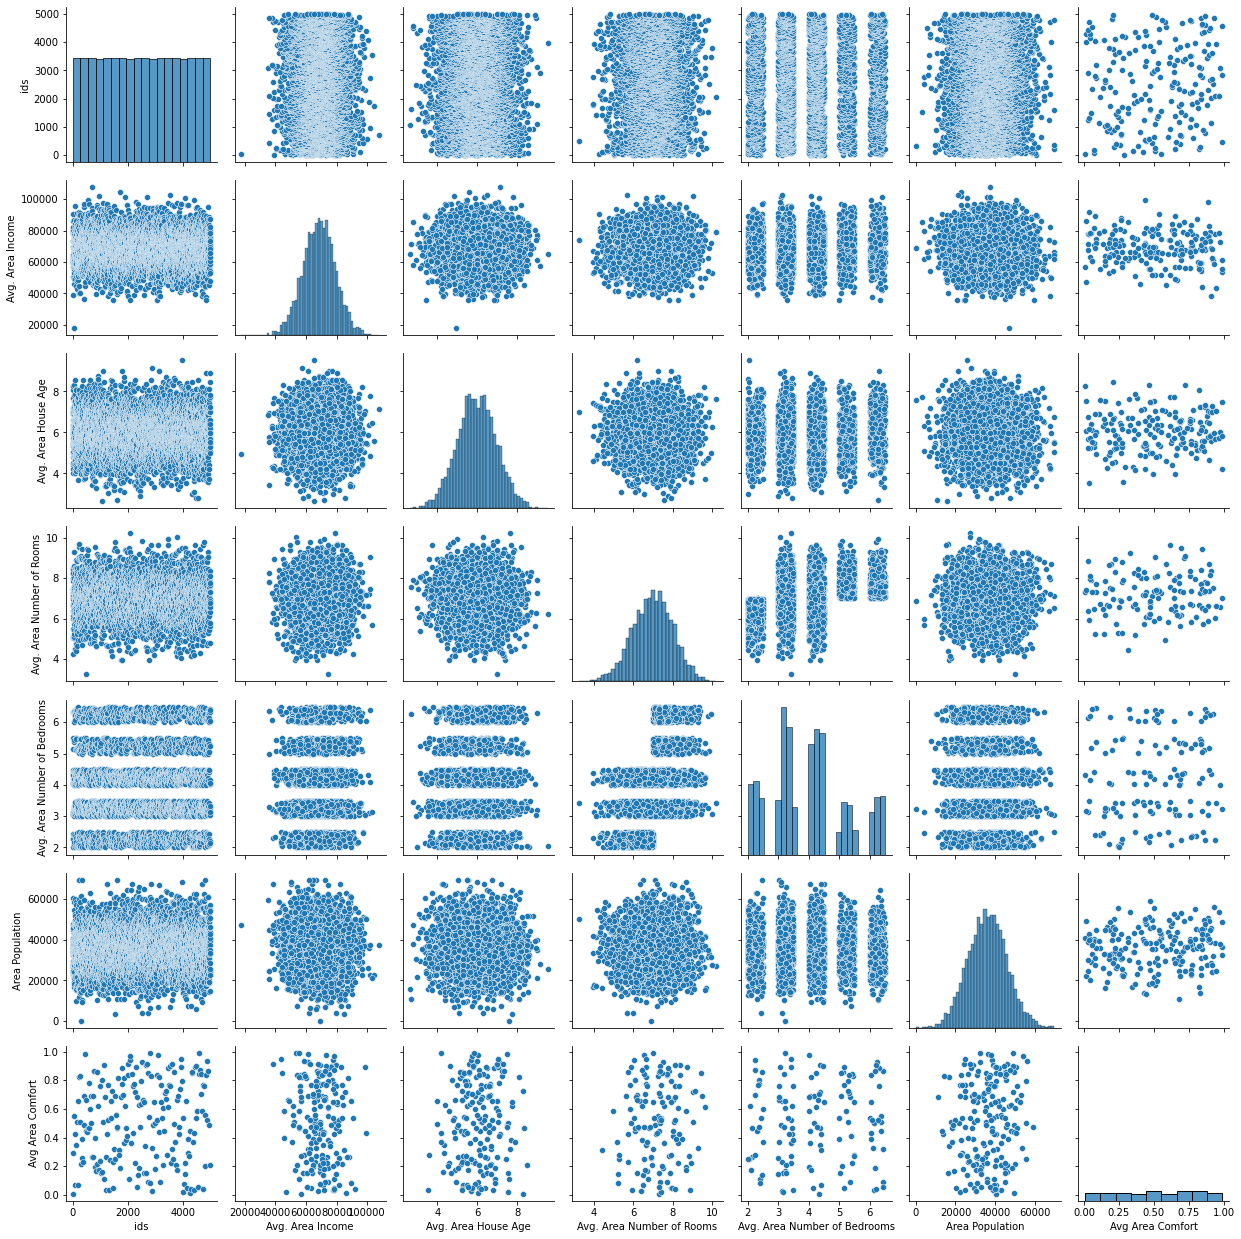

In [12]:
sns.pairplot(real)

In [13]:
real.isna().sum()

ids                                0
Avg. Area Income                   0
Avg. Area House Age                5
Avg. Area Number of Rooms       1667
Avg. Area Number of Bedrooms    1667
Area Population                    0
Price                              0
Address                            0
Avg Area Comfort                4800
dtype: int64

In [14]:
real.drop(["Avg Area Comfort"],axis=1,inplace=True)

In [15]:
real.isna().sum()

ids                                0
Avg. Area Income                   0
Avg. Area House Age                5
Avg. Area Number of Rooms       1667
Avg. Area Number of Bedrooms    1667
Area Population                    0
Price                              0
Address                            0
dtype: int64

In [16]:
real.Price.head(10)

0     $1059033.5578701235
1    Rs20078.545531292668
2     $1058987.9878760849
3    Rs16808.224088392624
4      $630943.4893385402
5    Rs14241.840991913738
6     $1502055.8173744078
7    Rs20985.820859702955
8      $798869.5328331633
9      Rs20602.0641685595
Name: Price, dtype: object

In [17]:
real["Price"] = real["Price"].str.replace("[$Rs]","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [18]:
real["Price"] = real["Price"].astype("float")

In [19]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ids                           5000 non-null   int64  
 1   Avg. Area Income              5000 non-null   float64
 2   Avg. Area House Age           4995 non-null   float64
 3   Avg. Area Number of Rooms     3333 non-null   float64
 4   Avg. Area Number of Bedrooms  3333 non-null   float64
 5   Area Population               5000 non-null   float64
 6   Price                         5000 non-null   float64
 7   Address                       5000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 312.6+ KB


In [20]:
p=[]
for i,a,b,c,d,e,f,g,h in real.itertuples():
    if (i%2==0):
        p.append(g)
    else:
        p.append(g*75)

In [21]:
real["Price"]=p

In [22]:
real.head()

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,0,79545.458574,NaN,NaN,NaN,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,3,63345.240046,7.188236,NaN,NaN,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [23]:
real["Address"][0]

'208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101'

In [24]:
def getstate(add):
     return add.split()[-2]

In [25]:
getstate('208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101')

'NE'

In [26]:
real["state"]=real["Address"].apply(getstate)

In [27]:
real.drop("Address",axis=1,inplace=True)

## Feature Selection

In [28]:
x=real.drop(["ids","Price"],axis=1)
y=real["Price"]

## EDA

In [29]:
real.head()

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,state
0,0,79545.458574,NaN,NaN,NaN,23086.800503,1.059034e+06,NE
1,1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,CA
2,2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,WI
3,3,63345.240046,7.188236,NaN,NaN,34310.242831,1.260617e+06,AP
4,4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,AE


In [30]:
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,state
0,79545.458574,NaN,NaN,NaN,23086.800503,NE
1,79248.642455,6.002900,6.730821,3.09,40173.072174,CA
2,61287.067179,5.865890,8.512727,5.13,36882.159400,WI
3,63345.240046,7.188236,NaN,NaN,34310.242831,AP
4,59982.197226,5.040555,7.839388,4.23,26354.109472,AE
...,...,...,...,...,...,...
4995,60567.944140,7.830362,NaN,NaN,22837.361035,AP
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,AA
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,VA
4998,68001.331235,5.534388,NaN,NaN,42625.620156,AE


In [31]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [32]:
x=x.values

In [33]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
x[:, -2:]=oe.fit_transform(x[:, -2:])

In [34]:
x

array([[79545.4585743167, nan, nan, nan, 468.0, 37.0],
       [79248.6424548256, 6.00289980827524, 6.73082101909491, 3.09,
        3274.0, 8.0],
       [61287.0671786567, 5.86588984031, 8.51272743037509, 5.13, 2642.0,
        59.0],
       ...,
       [63390.6868855046, 7.25059061477954, 4.80508098029115, 2.13,
        1941.0, 55.0],
       [68001.3312350869, 5.53438841622034, nan, nan, 3707.0, 1.0],
       [65510.5818036662, 5.99230530733397, 6.79233610442498, 4.07,
        4283.0, 41.0]], dtype=object)

In [35]:
from sklearn.impute import SimpleImputer

In [36]:
si= SimpleImputer(missing_values=np.nan,strategy="mean")

In [37]:
x=si.fit_transform(x)

In [38]:
x

array([[7.95454586e+04, 5.97681990e+00, 6.99441432e+00, 3.99808281e+00,
        4.68000000e+02, 3.70000000e+01],
       [7.92486425e+04, 6.00289981e+00, 6.73082102e+00, 3.09000000e+00,
        3.27400000e+03, 8.00000000e+00],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 5.13000000e+00,
        2.64200000e+03, 5.90000000e+01],
       ...,
       [6.33906869e+04, 7.25059061e+00, 4.80508098e+00, 2.13000000e+00,
        1.94100000e+03, 5.50000000e+01],
       [6.80013312e+04, 5.53438842e+00, 6.99441432e+00, 3.99808281e+00,
        3.70700000e+03, 1.00000000e+00],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, 4.07000000e+00,
        4.28300000e+03, 4.10000000e+01]])

In [39]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

## Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(xtrain, ytrain)
ypred = linreg.predict(xtest)

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
print(f"MSE : {mean_squared_error(ytest, ypred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(ytest, ypred))}")
print(f"R2 : {r2_score(ytest, ypred)}")

MSE : 16175763958.416317
RMSE : 127183.9768147557
R2 : 0.8724779178079392


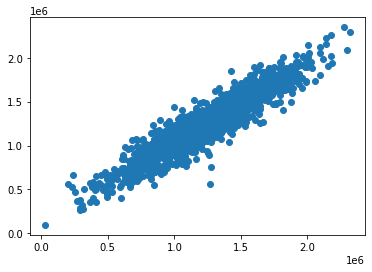

In [43]:
plt.scatter(ytest, ypred)

### SVR

In [44]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(xtrain, ytrain)
ypred = svm.predict(xtest)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
print(f"MSE : {mean_squared_error(ytest, ypred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(ytest, ypred))}")
print(f"R2 : {r2_score(ytest, ypred)}")

MSE : 126808634690.92632
RMSE : 356102.000402871
R2 : 0.0003006239896612417


## Random Forest

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)

In [47]:
from sklearn.metrics import mean_squared_error, r2_score
print(f"MSE : {mean_squared_error(ytest, ypred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(ytest, ypred))}")
print(f"R2 : {r2_score(ytest, ypred)}")

MSE : 19727388445.903866
RMSE : 140454.2218870756
R2 : 0.8444785880097894


## Standardization

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [49]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(xtrain, ytrain)
ypred = svm.predict(xtest)

In [50]:
from sklearn.metrics import mean_squared_error, r2_score
print(f"MSE : {mean_squared_error(ytest, ypred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(ytest, ypred))}")
print(f"R2 : {r2_score(ytest, ypred)}")

MSE : 126763507667.62975
RMSE : 356038.63226850785
R2 : 0.0006563841249290769


## Hyper parameter tuning

In [51]:
#C=10, degree=1, gamma=1, kernel='linear'
from sklearn.svm import SVR
svm = SVR(C=90, degree=1, gamma=1, kernel='linear')
svm.fit(xtrain, ytrain)
ypred = svm.predict(xtest)

In [52]:
from sklearn.metrics import mean_squared_error, r2_score
print(f"MSE : {mean_squared_error(ytest, ypred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(ytest, ypred))}")
print(f"R2 : {r2_score(ytest, ypred)}")

MSE : 35818657909.78089
RMSE : 189258.17792048218
R2 : 0.7176226205004796


In [53]:
svm.score(xtrain,ytrain)

0.711986468370957

In [54]:
svm.score(xtest,ytest)

0.7176226205004796

## Gridsearch cv

In [55]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'C': [0.1, 1, 10, 100, 1000],              
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],              
              'kernel': ['rbf','linear'],             
              'degree':[1,2,3]}
 

In [56]:
grid = GridSearchCV(SVR(), param_grid)

In [57]:
grid.fit(xtrain, ytrain)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'degree': [1, 2, 3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [58]:
grid.best_estimator_ 

SVR(C=1000, degree=1, gamma=1, kernel='linear')

In [59]:
svm = SVR(C=1000, degree=1, gamma=1, kernel='linear')
svm.fit(xtrain, ytrain)
ypred = svm.predict(xtest)

In [60]:
from sklearn.metrics import mean_squared_error, r2_score
print(f"MSE : {mean_squared_error(ytest, ypred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(ytest, ypred))}")
print(f"R2 : {r2_score(ytest, ypred)}")

MSE : 16306591498.279175
RMSE : 127697.2650383679
R2 : 0.8714465352819414


In [61]:
svm.score(xtrain,ytrain)

0.8690601027661949

In [62]:
svm.score(xtest,ytest)

0.8714465352819414

## by applying gridsearch cv and putting best parameter we get the R2 score is 87%